In [2]:
# Required libraries
import matplotlib.pyplot as plt
%matplotlib
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap # Import the Basemap toolkit
import numpy as np # Import the Numpy package
from cpt_convert import loadCPT # Import the CPT convert function
from matplotlib.colors import LinearSegmentedColormap # Linear interpolation for color maps
from datetime import datetime
from pyproj import Proj

# Converts the CPT file to be used in Python
cpt = loadCPT('IR4AVHRR6.cpt')
# Makes a linear interpolation with the CPT file
cpt_convert = LinearSegmentedColormap('cpt', cpt)

Using matplotlib backend: TkAgg


In [3]:
# Path to the GOES-R simulated image file
path = 'ABI-L2-CMIPF%2F2017%2F282%2F04%2FOR_ABI-L2-CMIPF-M3C14_G16_s20172820400410_e20172820411176_c20172820411260.nc'
 
# Search for the Scan Start in the file name
Start = (path[path.find("s")+1:path.find("_e")-1])
End = (path[path.find("e")+1:path.find("_c")-1])

# Format the "Observation Start" string
datetime_start = datetime.strptime(Start,'%Y%j%H%M%S')
datetime_end = datetime.strptime(End,'%Y%j%H%M%S')

In [4]:
# Open the file using the NetCDF4 library
nc = Dataset(path)
 
# Extract the Brightness Temperature values from the NetCDF
data = nc.variables['CMI'][:]-273.15

ori_proj = nc.variables['goes_imager_projection']
# Satellite height
sat_h = ori_proj.perspective_point_height
# Satellite longitude
sat_lon = ori_proj.longitude_of_projection_origin
# Satellite sweep
sat_sweep = ori_proj.sweep_angle_axis

# The projection x and y coordinates equals
# the scanning angle (in radians) multiplied by the satellite height (http://proj4.org/projections/geos.html)
X = nc.variables['x'][:] * sat_h
Y = nc.variables['y'][:] * sat_h

p = Proj(proj='geos', h=sat_h, lon_0=sat_lon, sweep=sat_sweep)
# Convert map points to latitude and longitude with the magic provided by Pyproj
XX, YY = np.meshgrid(X, Y)
lons, lats = p(XX, YY, inverse=True)

<IPython.core.display.Javascript object>


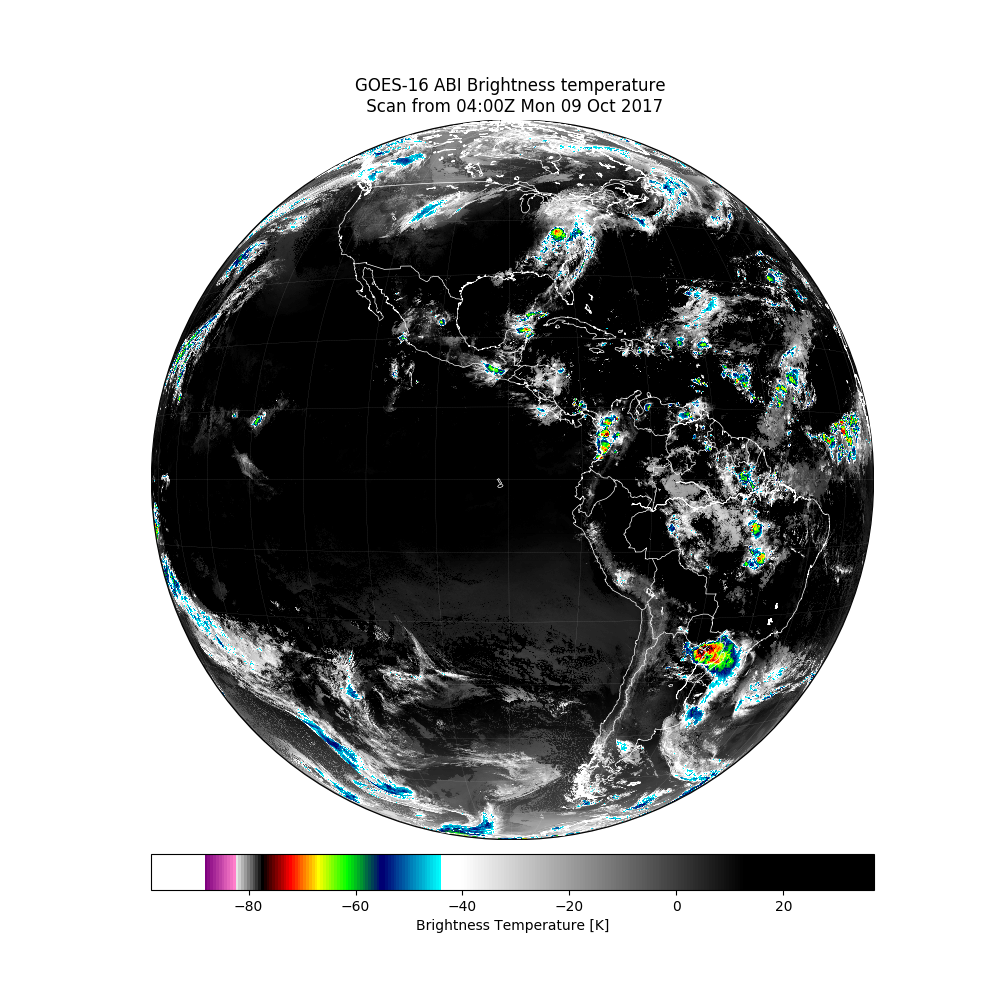

In [6]:
#
# Normal plot with original projection
#
# plt.figure(figsize=(10,10))
bmap = Basemap(projection='geos', lon_0=-89.5, lat_0=0.0, satellite_height=35786023.0, ellps='GRS80', resolution='l')

# Plot GOES-16 Channel using 170 and 378 as the temperature thresholds
bmap.imshow(data, origin='upper', vmin=175-273.15, vmax=310-273.15, cmap=cpt_convert)
 
# Draw the coastlines, countries, parallels and meridians
bmap.drawcoastlines(linewidth=0.5, linestyle='solid', color='white')
bmap.drawcountries(linewidth=0.5, linestyle='solid', color='white')
bmap.drawparallels(np.arange(-90.0, 90.0, 10.0), linewidth=0.1, color='white')
bmap.drawmeridians(np.arange(0.0, 360.0, 10.0), linewidth=0.1, color='white')
 
# Insert the legend
bmap.colorbar(location='bottom', label='Brightness Temperature [K]')

date_formatted = datetime.strftime(datetime_start,'%H:%MZ %a %d %b %Y')
plt.title("GOES-16 ABI Brightness temperature \n Scan from " +date_formatted)

#Export result
# DPI = 300
# plt.savefig('GOES-16_Ch13.png', dpi=DPI, bbox_inches='tight', pad_inches=0)
 
# Show the plot
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

In [5]:
##
# Plot with zoomed domain
##
# plt.figure(figsize=(10,10))# Create the basemap reference for the Satellite Projection
bmap = Basemap(projection='cyl', llcrnrlon=-80, llcrnrlat=-30, urcrnrlon=-40, urcrnrlat=-10,  resolution='i')

# Plot GOES-16 Channel using 170 and 378 as the temperature thresholds
bmap.contourf(lons,lats,data, np.arange(-90,30,0.5),cmap=cpt_convert)
 
# Draw the coastlines, countries, parallels and meridians
bmap.drawcoastlines(linewidth=0.5, linestyle='solid', color='white')
bmap.drawcountries(linewidth=0.5, linestyle='solid', color='white')
bmap.drawparallels(np.arange(-90.0, 90.0, 10.0), linewidth=0.1, color='white', labels=[True, False, False, True])
bmap.drawmeridians(np.arange(0.0, 360.0, 10.0), linewidth=0.1, color='white', labels=[True, False, False, True])
 
# Insert the legend
bmap.colorbar(location='right', label='Brightness Temperature [K]')

date_formatted = datetime.strftime(datetime_start,'%H:%MZ %a %d %b %Y')
plt.title("GOES-16 ABI Brightness temperature \n Scan from " +date_formatted)

#Export result
DPI = 300
plt.savefig('GOES-16_Ch13_zoom.png', dpi=DPI, bbox_inches='tight', pad_inches=0)
 
# Show the plot
#plt.rcParams['figure.figsize'] = (10,20)
plt.show()